##Import various python functions and modules that we need.

In [1]:
from pandas import DataFrame
from IPython.display import FileLink

##Pylab namespace and inline plots. Import Rmagic.

In [2]:
%matplotlib inline
%load_ext rpy2.ipython

### Import R libraries 

In [3]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(vegan)
library(dplyr)
library(plyr)
library(RColorBrewer)
library(stats)
library(stringr)
library(gdata)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattic

### Setting Directories

In [4]:
%%R
workDir = '/home/chantal/Chazy/Chazy_SIP/data'
figDir = '/home/chantal/Chazy/Chazy_SIP/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/'
physeqSIP = 'SIP-norm-core_unk_spar0.25'
#physeqBulk = 'bulk-core' 

nprocs = 20

### Loading Physeq Files

In [5]:
%%R 

F = file.path(physeqDir, physeqSIP)
physeq.SIP = readRDS(F)
physeq.SIP.m = physeq.SIP %>% sample_data
physeq.SIP = prune_samples(!(physeq.SIP.m$Full.sample %in% c('12C.PTH.D30.R3_Frac26','12C.NTH.D3.R4.Frac9')),
                           physeq.SIP)
#physeq.SIP2 = prune_samples((physeq.SIP.m$Full.sample != '12C.NTH.D3.R4.Frac9'), physeq.SIP)
physeq.SIP.m = physeq.SIP %>% sample_data

physeq.SIP

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3910 taxa and 608 samples ]
sample_data() Sample Data:       [ 608 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 3910 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3910 tips and 3909 internal nodes ]


### Ordinate using weighted unifrac distances with NMDS.

### Calculate Unifrac distances between samples.

In [6]:
%%R
registerDoParallel(cores=20)
wunif.dist = distance(physeq.SIP, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [7]:
%%R -w 700 -h 500
nmds = ordinate(physeq.SIP, 
                method = "NMDS", 
                distance = wunif.dist)#.nopas)
p.nmds = plot_ordination(physeq.SIP, nmds, justDF = TRUE)

Run 0 stress 0.1353631 
Run 1 stress 0.1660247 
Run 2 stress 0.1352695 
... New best solution
... procrustes: rmse 0.001951032  max resid 0.04784583 
Run 3 stress 0.1563508 
Run 4 stress 0.1856012 
Run 5 stress 0.1806875 
Run 6 stress 0.4197771 
Run 7 stress 0.1479797 
Run 8 stress 0.1770186 
Run 9 stress 0.1593682 
Run 10 stress 0.1555289 
Run 11 stress 0.1920611 
Run 12 stress 0.1822344 
Run 13 stress 0.4197781 
Run 14 stress 0.1836027 
Run 15 stress 0.1776082 
Run 16 stress 0.1634489 
Run 17 stress 0.1614193 
Run 18 stress 0.1437206 
Run 19 stress 0.1855597 
Run 20 stress 0.1495094 


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


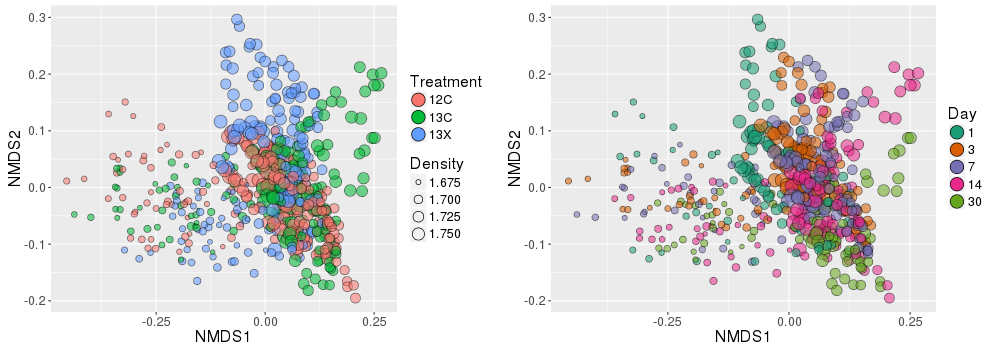

In [8]:
%%R -w 1000 -h 350
asNumeric = function(x) { as.numeric(as.character(x)) }

p1 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch=21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 
      

p2 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor(asNumeric(Day)), size = asNumeric(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Day", palette = "Dark2") + theme(text = element_text(size=16)) 

p.combined = grid.arrange(p1, p2, ncol=2)
print(p.combined)

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


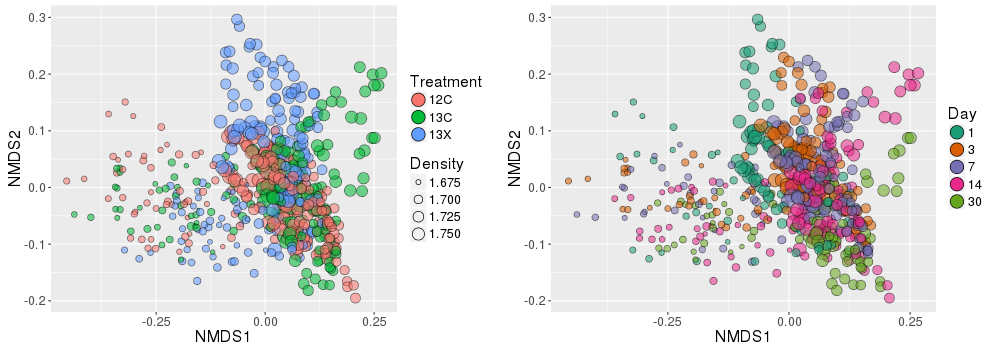

In [9]:
%%R -w 1000 -h 350
asNumeric = function(x) { as.numeric(as.character(x)) }

p.nmds2 = filter(p.nmds, Replicate == 4 )

p1 = ggplot(p.nmds2, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch=21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 
      

p2 = ggplot(p.nmds2, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor(asNumeric(Day)), size = asNumeric(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Day", palette = "Dark2") + theme(text = element_text(size=16)) 

p.combined = grid.arrange(p1, p2, ncol=2)
print(p.combined)

TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]


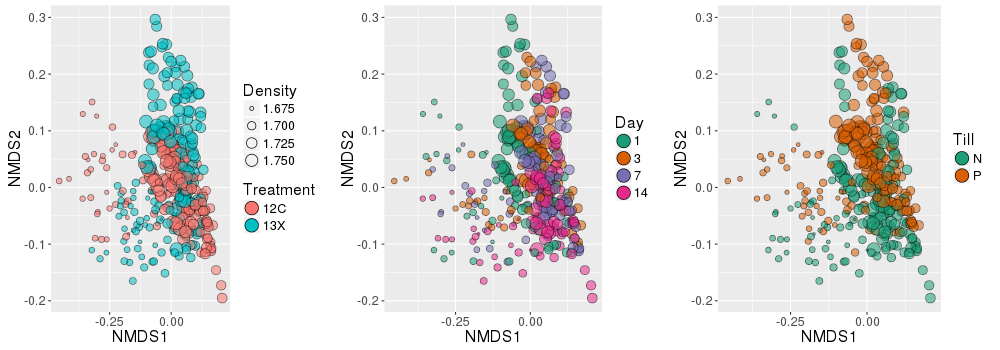

In [10]:
%%R -w 1000 -h 350
asNumeric = function(x) { as.numeric(as.character(x)) }

xylose = filter(p.nmds, Treatment %in% c("13X","12C"), Day %in% c(1,3,7,14))

p1 = ggplot(xylose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch=21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 
      

p2 = ggplot(xylose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor(asNumeric(Day)), size = asNumeric(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Day", palette = "Dark2") + theme(text = element_text(size=16)) 

p3 = ggplot(xylose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor((Till)), size = asNumeric(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Till", palette = "Dark2") + theme(text = element_text(size=16)) 


p.combined = grid.arrange(p1, p2, p3, ncol=3)
print(p.combined)

TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]


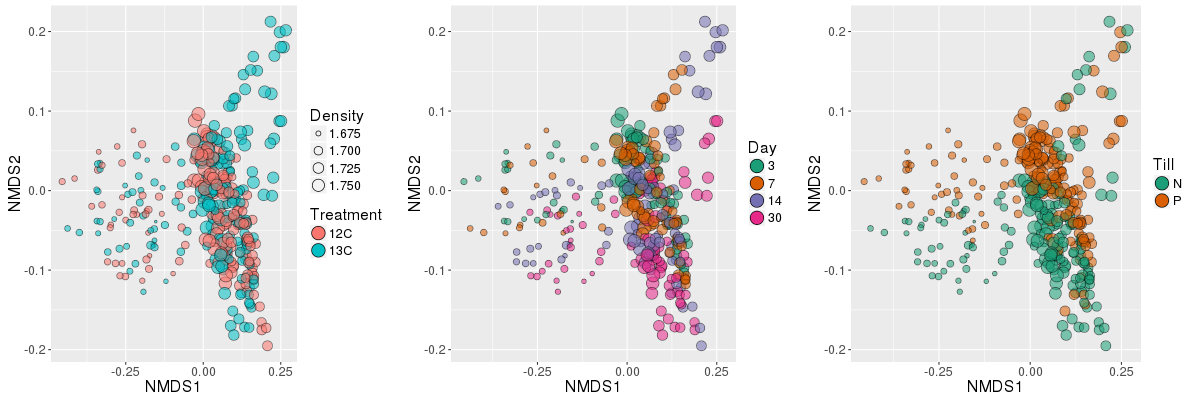

In [11]:
%%R -w 1200 -h 400
asNumeric = function(x) { as.numeric(as.character(x)) }

cellulose = filter(p.nmds, Treatment %in% c("13C","12C"), Day %in% c(3,7,14,30))

p1 = ggplot(cellulose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch=21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 


p2 = ggplot(cellulose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor(asNumeric(Day)), size = asNumeric(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Day", palette = "Dark2") + theme(text = element_text(size=16)) 

p3 = ggplot(cellulose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor((Till)), size = asNumeric(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Till", palette = "Dark2") + theme(text = element_text(size=16)) 


p.combined = grid.arrange(p1, p2, p3, ncol=3)
print(p.combined)

In [12]:
%%R -w 1000 -h 350
pdf("/home/chantal/Chazy/Chazy_SIP/data/figs/CellOrd_byDay.pdf", width = 12, height = 5)
grid.arrange(p1, p2, ncol=2)
dev.off()

png 
  2 


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


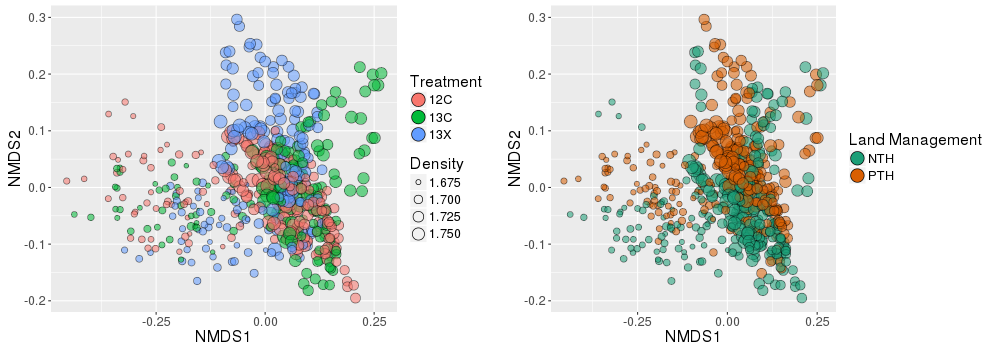

In [13]:
%%R -w 1000 -h 350
asNumeric = function(x) { as.numeric(as.character(x)) }

p1 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch=21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 
      

p2 = ggplot(p.nmds, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(fill = factor(as.factor(Land_Management)), size = as.factor(Density), alpha = 0.95), pch=21) +
        guides(alpha = FALSE, size = FALSE, fill=guide_legend(override.aes=list(size=6)))+
        scale_fill_brewer("Land Management", palette = "Dark2") + theme(text = element_text(size=16)) 

p.combined = grid.arrange(p1, p2, ncol=2)
print(p.combined)

In [14]:
%%R -w 1000 -h 350
pdf("/home/chantal/Chazy/Chazy_SIP/data/figs/CellOrd_byLM.pdf", width = 12, height = 5)
grid.arrange(p1, p2, ncol=2)
dev.off()

png 
  2 


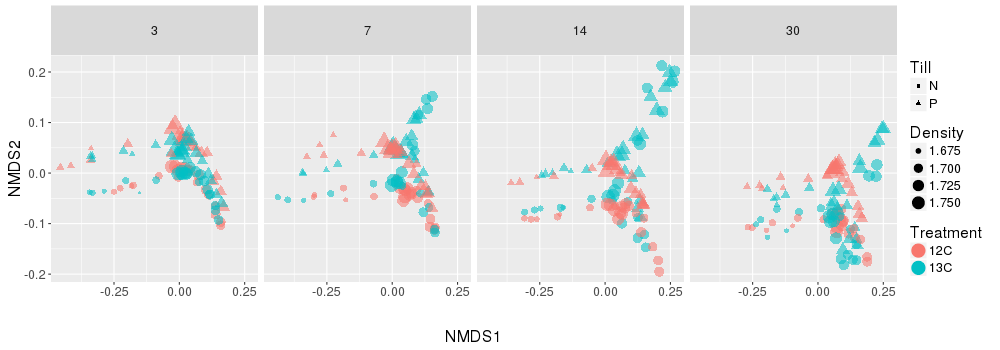

In [31]:
%%R -w 1000 -h 350
asNumeric = function(x) { as.numeric(as.character(x)) }


p1 = ggplot(cellulose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(shape = Till, color = Treatment, fill = Treatment, size = asNumeric(Density), alpha = 0.85)) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 

p1 = p1 + facet_grid(~Day)

p1

In [32]:
%%R
ggsave('data/figs/Cell_ord.jpg', width = 10, height = 4)

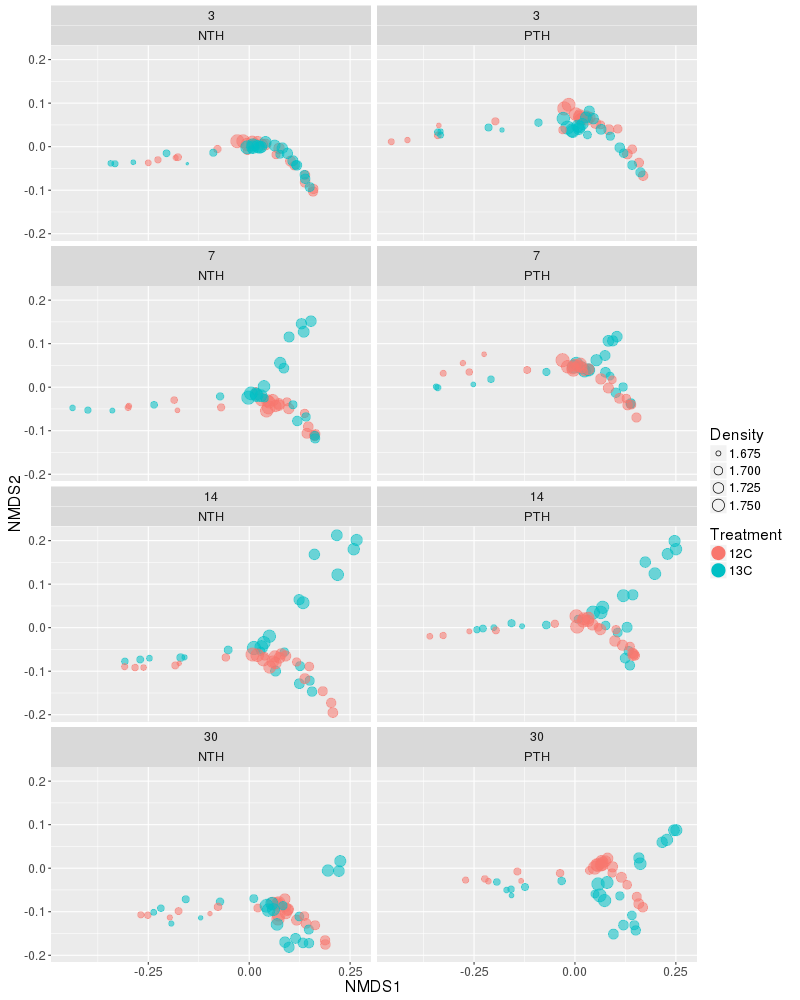

In [17]:
%%R -w 800 -h 1000
asNumeric = function(x) { as.numeric(as.character(x)) }


p1 = ggplot(cellulose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Treatment, fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch = 21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 

p1 = p1 + facet_wrap(~Day + Land_Management, ncol = 2)

p1

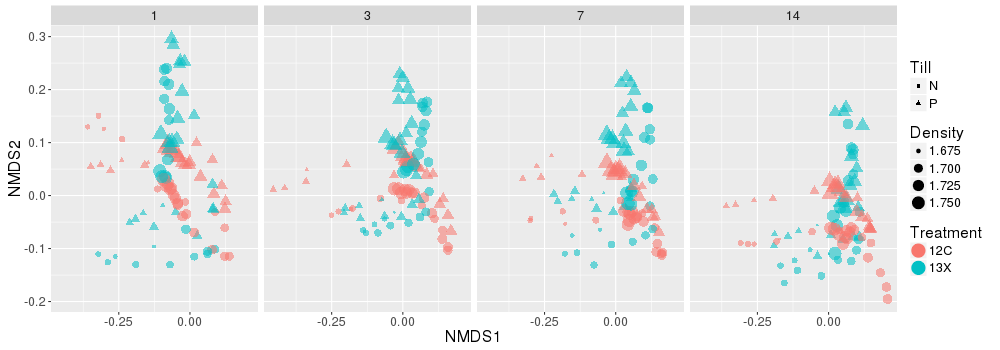

In [29]:
%%R -w 1000 -h 350
asNumeric = function(x) { as.numeric(as.character(x)) }


p1 = ggplot(xylose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(shape = Till, color = Treatment, fill = Treatment, size = asNumeric(Density), alpha = 0.85)) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 

p1 = p1 + facet_grid(~Day)

p1

In [30]:
%%R
ggsave('data/figs/Xyl_ord.jpg', width = 10, height = 4)

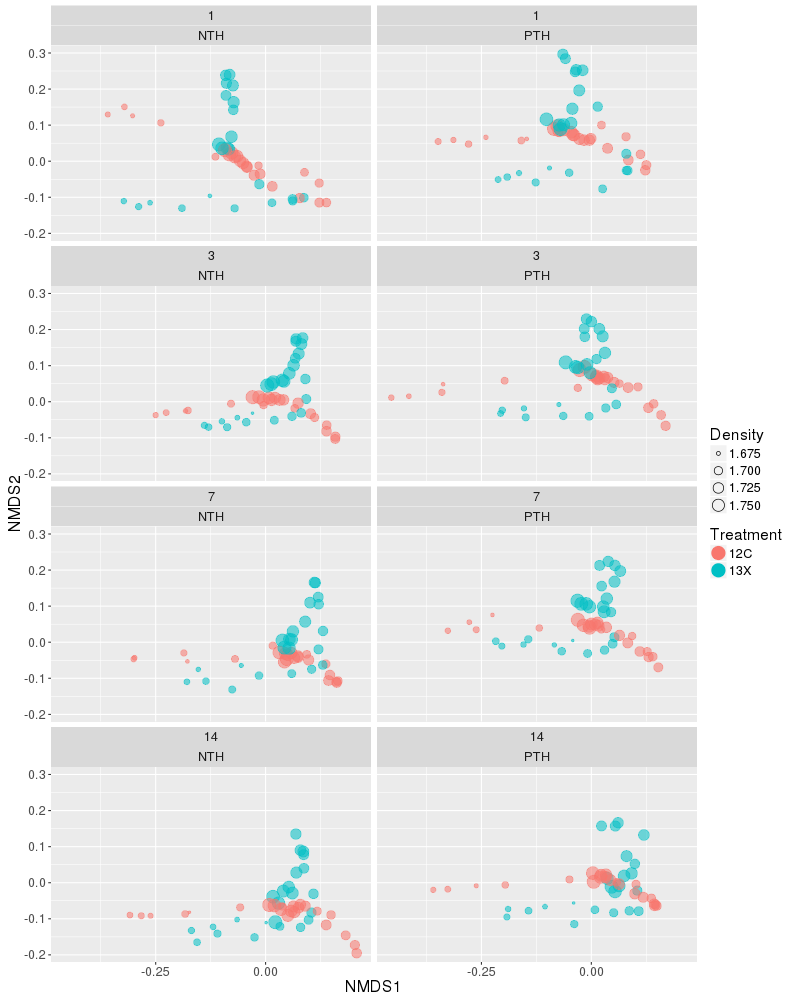

In [20]:
%%R -w 800 -h 1000
asNumeric = function(x) { as.numeric(as.character(x)) }


p1 = ggplot(xylose, aes(x = NMDS1, y = NMDS2)) +  
        geom_point(aes(color = Treatment, fill = Treatment, size = asNumeric(Density), alpha = 0.85), pch = 21) +
        guides(alpha = FALSE, fill=guide_legend(override.aes=list(size=6))) + labs(size = "Density") +
        theme(text = element_text(size=16)) 

p1 = p1 + facet_wrap(~Day + Land_Management, ncol = 2)

p1

### Adonis Statistics 

**Splitting physeq object into cellulose/xylose specific datasets **

In [21]:
%%R
physeq.xylose = prune_samples(physeq.SIP.m$Treatment %in% c('12C', '13X') & physeq.SIP.m$Day %in% c(1,3,7,14),
                           physeq.SIP)
physeq.cellulose = prune_samples(physeq.SIP.m$Treatment %in% c('12C', '13C') & physeq.SIP.m$Day %in% c(3,7,14,30),
                          physeq.SIP)

print(physeq.xylose)
print(physeq.cellulose)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3910 taxa and 374 samples ]
sample_data() Sample Data:       [ 374 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 3910 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3910 tips and 3909 internal nodes ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3910 taxa and 371 samples ]
sample_data() Sample Data:       [ 371 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 3910 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3910 tips and 3909 internal nodes ]


In [22]:
%%R
registerDoParallel(cores=20)
wunif.xyl = distance(physeq.xylose, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

wunif.cell = distance(physeq.cellulose, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

** Adonis Statistics for Cellulose/xylose fraction datasets**

In [23]:
%%R 
physeq.data = as(sample_data(physeq.xylose), "data.frame")
adonis(wunif.xyl ~ Treatment, physeq.data)



Call:
adonis(formula = wunif.xyl ~ Treatment, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Treatment   1    0.3747 0.37474  7.3179 0.01929  0.001 ***
Residuals 372   19.0495 0.05121         0.98071           
Total     373   19.4242                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [24]:
%%R 
physeq.data = as(sample_data(physeq.cellulose), "data.frame")
adonis(wunif.cell ~ Treatment, physeq.data)


Call:
adonis(formula = wunif.cell ~ Treatment, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Treatment   1    0.2557 0.255735  4.6862 0.01254  0.004 **
Residuals 369   20.1370 0.054572         0.98746          
Total     370   20.3928                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [25]:
%%R 

physeq.data = as(sample_data(physeq.xylose), "data.frame")
adonis(wunif.xyl ~ Till, physeq.data)


Call:
adonis(formula = wunif.xyl ~ Till, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Till        1    1.3207 1.32072  27.139 0.06799  0.001 ***
Residuals 372   18.1035 0.04867         0.93201           
Total     373   19.4242                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [26]:
%%R 

physeq.data = as(sample_data(physeq.cellulose), "data.frame")
adonis(wunif.cell ~ Till, physeq.data)


Call:
adonis(formula = wunif.cell ~ Till, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Till        1    1.1658 1.16581  22.374 0.05717  0.001 ***
Residuals 369   19.2270 0.05211         0.94283           
Total     370   20.3928                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [27]:
%%R
physeq.data = as(sample_data(physeq.xylose), "data.frame")
adonis(wunif.xyl ~ Day, physeq.data)


Call:
adonis(formula = wunif.xyl ~ Day, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Day         1    1.4468 1.44680  29.938 0.07448  0.001 ***
Residuals 372   17.9774 0.04833         0.92552           
Total     373   19.4242                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
%%R
physeq.data = as(sample_data(physeq.cellulose), "data.frame")
adonis(wunif.cell ~ Day, physeq.data)


Call:
adonis(formula = wunif.cell ~ Day, data = physeq.data) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)    
Day         1    1.0909 1.09092  20.855 0.0535  0.001 ***
Residuals 369   19.3019 0.05231         0.9465           
Total     370   20.3928                 1.0000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


** Subsetting datasets to heavy fractions only **
